In [10]:
import numpy as np
import pandas as pd
from numpy import array
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
import matplotlib
import matplotlib.pyplot as plt

In [11]:
# Dividimos la seuencia en muestras
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # Encontrar el fin del patron
        end_ix = i + n_steps
        # Verificar si estamos fuera de la secuencia
        if end_ix > len(sequence)-1:
            break
        # Reunimo las partes correspondientes a inputs y outputs del patron
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [12]:
# Dada una secuencia de Entrada
data= pd.read_csv('EURUSD1.csv', 
                  sep=',', 
                  names=["time", "Open", "Max", "Min", "Close", "Volumen"])
raw_seq=data['Max'].values
raw_seq=raw_seq[0:-1000]

In [13]:
# Numero de steps
n_steps = 3
# Separamos en muestras
X_raw, y_raw = split_sequence(raw_seq, n_steps)
X_train=X_raw[0:-50]
y_train=y_raw[0:-50]
X_test=X_raw[-50:]
y_test=y_raw[-50:]
# visualizar
#for i in range(len(X)):
#    print(X[i], y[i])

In [14]:
# reshape desde [samples, timesteps] a [samples, timesteps, features]
n_features = 1
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], n_features))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], n_features))

In [15]:
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [16]:
# Entrenamos el Modelo
model.fit(X_train, y_train, epochs=500, verbose=0)

Instructions for updating:
Use tf.cast instead.


In [17]:
# demonstrate prediction
y_teout = model.predict(X_test, verbose=0)
y_trout = model.predict(X_train, verbose=0)

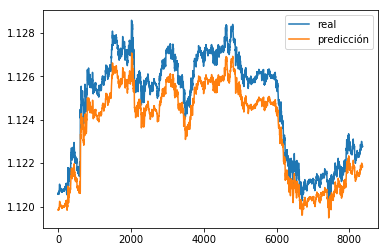

In [26]:
fig, ax = plt.subplots()
ax.plot(y_train, label='real')
ax.plot(y_trout,label='predicción')
ax.legend()
plt.show()

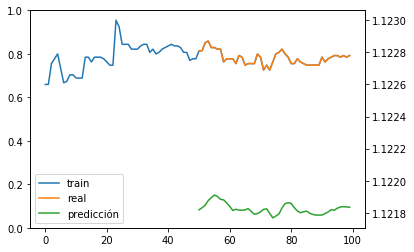

In [19]:
fig, ax = plt.subplots()
ax = ax.twinx()
ax.plot(y_raw[-100:], label='train')
ax.plot(np.arange(50)+50,y_test, label='real')
ax.plot(np.arange(50)+50,y_teout,label='predicción')
ax.legend()
plt.show()

In [20]:
vp=[]
fp=[]
vn=[]
fn=[]
for t in range(0,np.shape(y_test)[0]):
    if t+1> np.shape(y_test)[0]-1:
            break
    if y_teout[t+1]>y_teout[t] :
        if y_test[t+1]>y_test[t]:
            vp.append(1)
        else:
            fp.append(1)
    if y_teout[t+1]<y_teout[t]:
        if y_test[t+1]<y_test[t]:
            vn.append(1)
        else:
            fn.append(1)
acc=(sum(vp)+sum(fn))/(sum(vp)+sum(fn)+sum(vn)+sum(fp))
fnr=sum(fn)/(sum(vp)+sum(fn)+sum(vn)+sum(fp))
print('acc: ',acc)
    

acc:  0.5531914893617021


In [21]:
sum(vp)/sum(fn)

0.7333333333333333

In [23]:
sum(vp)

11

In [24]:
sum(fn)

15